<a href="https://colab.research.google.com/github/bargida/Workshops/blob/main/workshop_k_house.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

In [2]:
data_full = pd.read_csv("kc_house_data.csv")

In [3]:
data = data_full.sample(n=21000, random_state=279)

Q1 - Display the first five rows of the dataset.

In [24]:
data_full.head(5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


Q2 - Get a summary of the dataset

In [25]:
data_full.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


Q3 - Check whether there are any empty rows in the dataset

In [26]:
empty_rows = data[data.isnull().any(axis=1)]

In [27]:
num_empty_rows = len(empty_rows)
print(f"Number of empty rows: {num_empty_rows}")

Number of empty rows: 0


Q4 - Draw a graph for the count of houses and number of bedrooms
Drawing a heatmap for the correlation between the columns


In [29]:
def correlation_heatmap(df1):
  _, ax = plt.subplots(figsize = (15,10))
  colormap = sns.diverging_palette(220, 10, as_cmap = True)
  sns.heatmap(df1.corr(), annot = True, cmap = colormap)

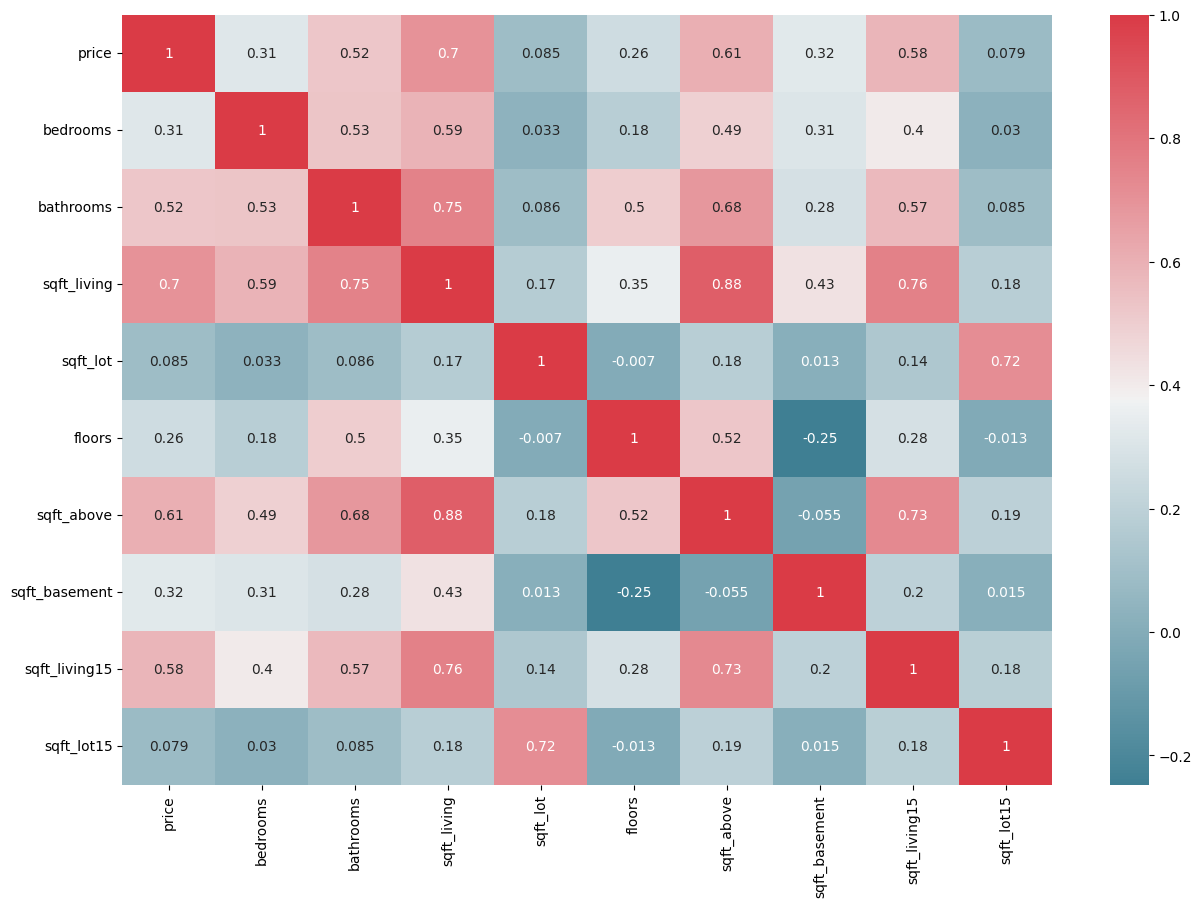

In [30]:
selected_data = data[['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'sqft_above', 'sqft_basement', 'sqft_living15',
'sqft_lot15']]
correlation_heatmap(selected_data)

<Axes: xlabel='sqft_living', ylabel='price'>

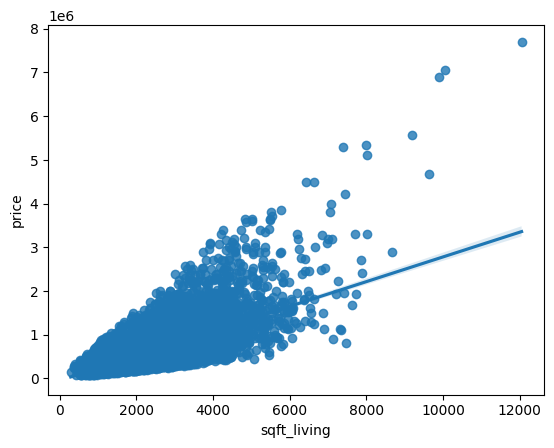

In [31]:
sns.regplot(x='sqft_living', y='price', data=data)

Q5 - Check the relationship between price and the size of the basement.
Check the relationship between grade and the price.


<Axes: xlabel='grade', ylabel='price'>

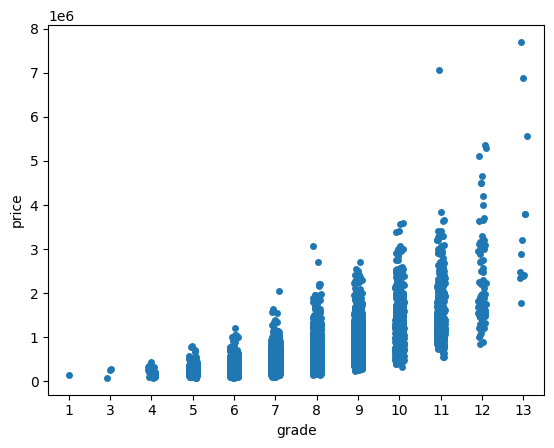

In [10]:
sns.stripplot(x='grade', y='price', data=data, size=5)

Q6 - Check the relationship between number of rooms and the price. Leave a comment about what
you found.
The graph indicates that the relation of price with bedrooms - price goes up with number of
bedrooms upto 6 and then comes down as no of bedrooms increase.

In [32]:
data=data[data[ 'bedrooms'] < 12]

In [33]:
c=['bedrooms','bathrooms','sqft_living','sqft_above','grade']
df= data[c]

In [34]:
df=pd.get_dummies(df,columns=[ 'grade'], drop_first=True)

In [14]:
y=data['price']

Perform train, test split. Put the last three digits of your index number as the random_state

(I must ask teacher index number means student number?)

In [35]:
from re import X
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df, y, test_size=0.2, random_state=267)

In [37]:
x_train.head()

,bedrooms,bathrooms,sqft_living,sqft_above,grade_3,grade_4,grade_5,grade_6,grade_7,grade_8,grade_9,grade_10,grade_11,grade_12,grade_13
13448,4,3.25,4160,4160,False,False,False,False,False,False,False,True,False,False,False
13226,4,2.50,2800,2800,False,False,False,False,False,False,True,False,False,False,False
4903,3,1.50,1240,1240,False,False,False,False,True,False,False,False,False,False,False
7731,4,2.50,3220,3220,False,False,False,False,False,False,False,True,False,False,False
21099,3,2.50,1740,1740,False,False,False,False,True,False,False,False,False,False,False


In [38]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()

In [39]:
reg.fit(x_train, y_train)

LinearRegression()

Print the results of the regression model

In [40]:
from sklearn import metrics
print('Coefficients:\n ', reg.coef_)
print('Mean Squared Error ', metrics.mean_squared_error(y_test,
                                                        reg.predict(x_test)))
print('R-square ', reg.score(x_test,y_test))


Coefficients:
  [-2.42145141e+04 -2.30883134e+03  2.43379038e+02 -9.53343487e+01
  1.14108260e+05  5.74875227e+04  5.52602894e+04  8.31593752e+04
  1.09849022e+05  1.80629434e+05  3.15641379e+05  5.24845745e+05
  8.13349771e+05  1.38091444e+06  2.56949440e+06]
Mean Squared Error  51791623762.08913
R-square  0.6029431088420999


Visualizing the relationship between floors, view and condition with the price

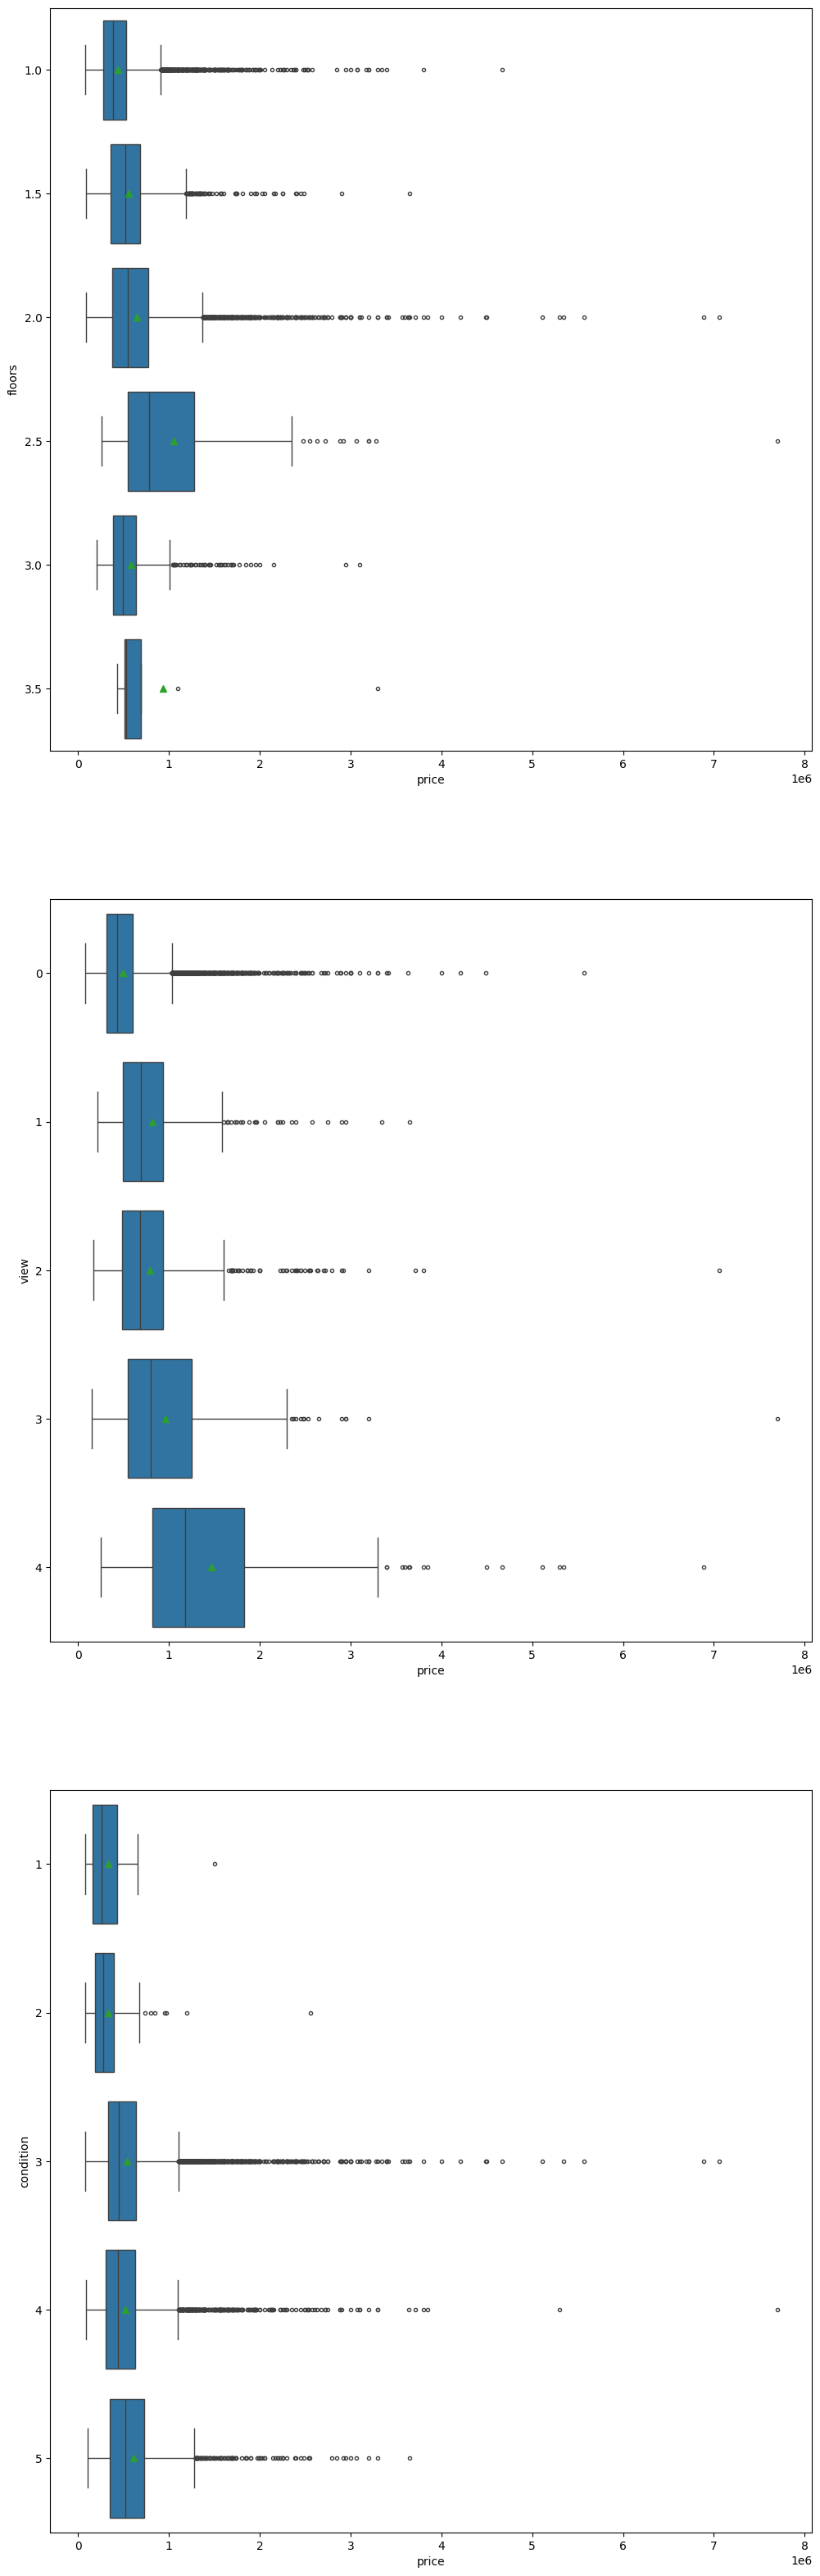

In [41]:
fig, axarr=plt.subplots(3, figsize=(12,40))
sns.boxplot(y='floors', x='price', data=data,width=0.8,
  orient='h', showmeans=True, fliersize=3, ax=axarr[0])
sns.boxplot(y='view', x='price', data=data,width=0.8,
  orient='h', showmeans=True, fliersize=3, ax=axarr[1])
sns.boxplot(y='condition', x='price', data=data,width=0.8,
  orient='h', showmeans=True, fliersize=3, ax=axarr[2])
plt.show()

Visualize the house prices on map

In [42]:
import folium
from folium.plugins import HeatMap

In [43]:
maxpr = data.loc[data['price'].idxmax()]

def generateBaseMap(default_location=[47.5112, -122.257],default_zoom_start=9.4):
  base_map = folium.Map(location=default_location, control_scale=True,
                        zoom_start=default_zoom_start)
  return base_map
df_copy=data.copy()

df_copy['count'] = 1
basemap = generateBaseMap()
folium.TileLayer('cartodbpositron').add_to(basemap)
s=folium.FeatureGroup(name='icon').add_to(basemap)
folium.Marker([maxpr['lat'], maxpr['long']],
              popup = 'Highest Price: $'+str(format(maxpr['price'],'.0f')),
              icon=folium.Icon(color='green')).add_to(s)
HeatMap(data=df_copy[['lat', 'long', 'count']].groupby(['lat', 'long']).sum().reset_index(),
        radius=8,max_zoom=13,name='Heat Map').add_to(basemap)
folium.LayerControl(collapsed=False).add_to(basemap)
basemap

In [44]:
df=pd.get_dummies(data,columns=['waterfront','view','condition','grade','zipcode'],
drop_first=True)

In [45]:
y=data['price']
df=df.drop([ 'date','id','price'],axis=1)

Perform train, test split. Put the last three digits of your index number as the random_state

In [46]:
x_train, x_test,y_train,y_test=train_test_split(df,y,train_size=0.8,
random_state=267)

Q8 - Apply linear regression

In [47]:
reg = LinearRegression()
reg.fit(x_train, y_train)

LinearRegression()

Q9 - Print the results of the regression model


In [51]:
y_pred = reg.predict(x_test)

In [52]:
from sklearn import metrics
print('Coefficients:\n ', reg.coef_)
print('Mean Squared Error ', metrics.mean_squared_error(y_test, reg.predict(x_test)))
print('R-square ', reg.score(x_test,y_test))


Coefficients:
  [-1.39483340e+04  2.64697959e+04  9.67444350e+01  2.44111637e-01
 -3.18248789e+04  7.43185032e+01  2.24259323e+01 -2.99257758e+02
  2.60086028e+01  2.45613915e+05 -1.81085347e+05  1.48985010e+01
 -1.18773373e-01  6.05266426e+05  7.82843867e+04  6.74088002e+04
  1.48242716e+05  2.94749100e+05  8.02748918e+04  9.72538929e+04
  1.22922784e+05  1.64081398e+05  5.27203279e+04 -3.54739981e+04
 -1.04174625e+05 -1.05849728e+05 -1.07030497e+05 -8.68525581e+04
 -1.73679213e+04  1.14038005e+05  2.97565743e+05  7.28483305e+05
  1.82316075e+06  1.89374651e+04 -1.21507570e+04  7.02310155e+05
  2.70541073e+05  2.11429933e+05  2.07631607e+05  2.17960575e+05
  1.00441828e+05  4.32561040e+04  6.79134791e+04  5.24646514e+04
  6.58880973e+04 -3.82168794e+04  1.56714581e+05  1.62475198e+05
  3.57120366e+04  2.20695252e+05  8.21070871e+03  1.11971714e+04
 -1.05653645e+04  2.83218580e+05  1.17515774e+05  6.97862918e+04
  1.11261563e+06  4.48118793e+05  2.33322459e+04  1.52792044e+05
  1.83700